In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow.keras import models, layers

In [3]:
path1=r"dataset_Abnormal.csv"
path2=r"dataset_Normal.csv"
df1=pd.read_csv(path1)
df2=pd.read_csv(path2)
dfcombine=pd.concat([df1,df2],axis=0)

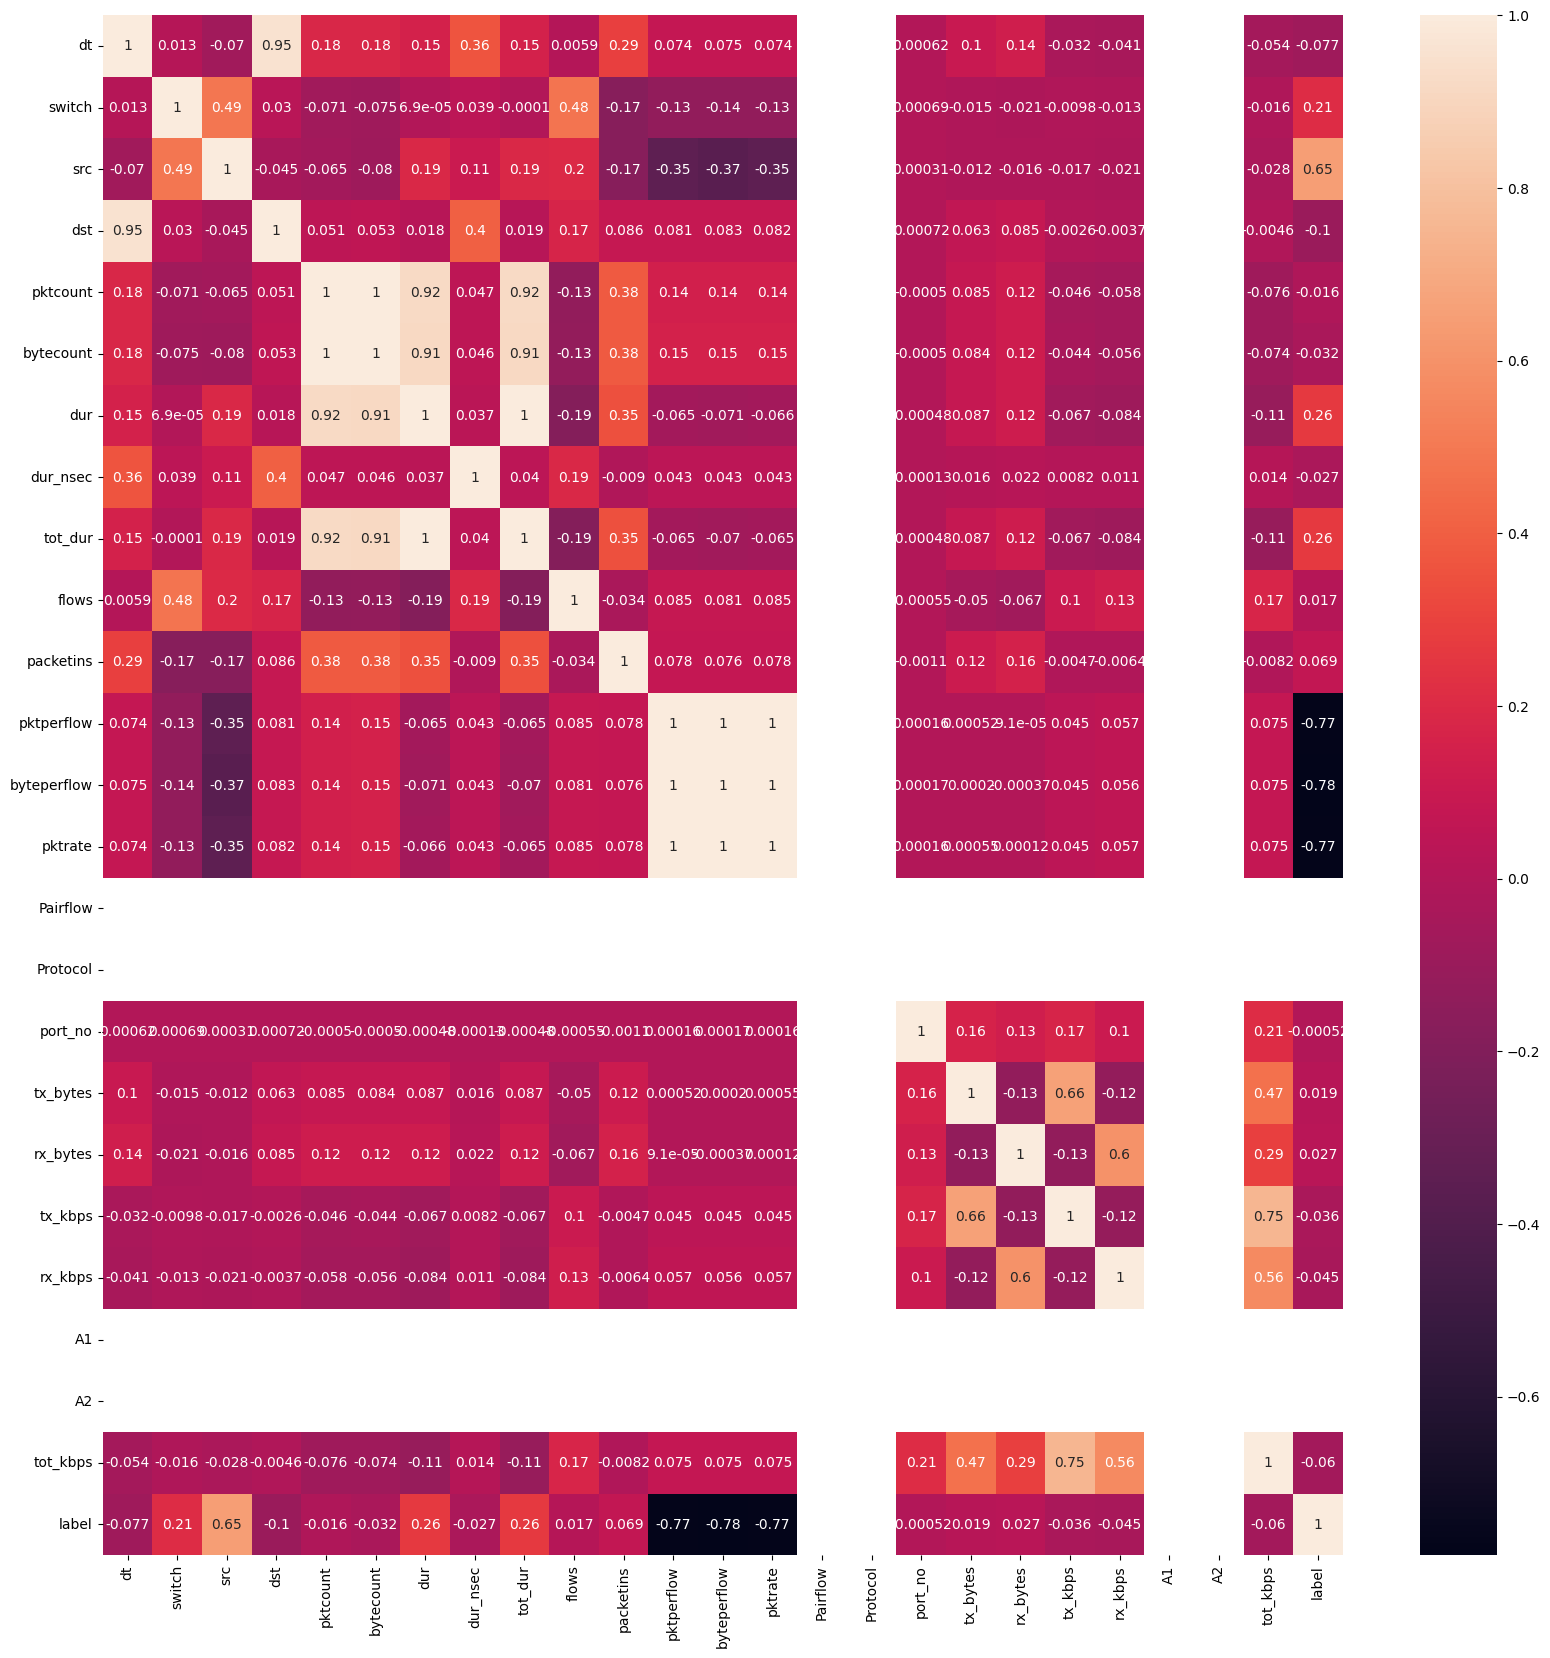

In [10]:
#corellation matrix
corrmat = dfcombine.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dfcombine[top_corr_features].corr(),annot=True)


In [ ]:
#drop one column from highly corelated columns
for column in dfcombine.columns:
    if dfcombine[column].std()==0:
        dfcombine.drop(column, axis=1, inplace=True)    



In [11]:
corr_matrix = dfcombine.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.8)
threshold = 0.8
columns_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]

# Drop the correlated columns
dfcombine.drop(columns_to_drop, axis=1, inplace=True)

print("DataFrame after dropping correlated columns:")
print(dfcombine)

DataFrame after dropping correlated columns:
         dt  switch        src  pktcount   dur_nsec  flows  packetins  \
0     11335       1  167772161      4777  711000000      3       1790   
1     11335       1  167772161      4777  711000000      3       1790   
2     11335       1  167772161      4777  711000000      3       1790   
3     11335       1  167772161      4777  711000000      3       1790   
4     11335       1  167772161      4777  711000000      3       1790   
...     ...     ...        ...       ...        ...    ...        ...   
7994  12025       4  167772165     36168  625000000      3       2242   
7995  12025       4  167772165     36168  625000000      3       2242   
7996  12025       4  167772165     36168  625000000      3       2242   
7997  12025       4  167772165     36168  625000000      3       2242   
7998  12025       4  167772164     58582  240000000      3       2242   

      pktperflow  Pairflow  Protocol  port_no  tx_bytes   rx_bytes  tx_kbps  \

<Axes: >

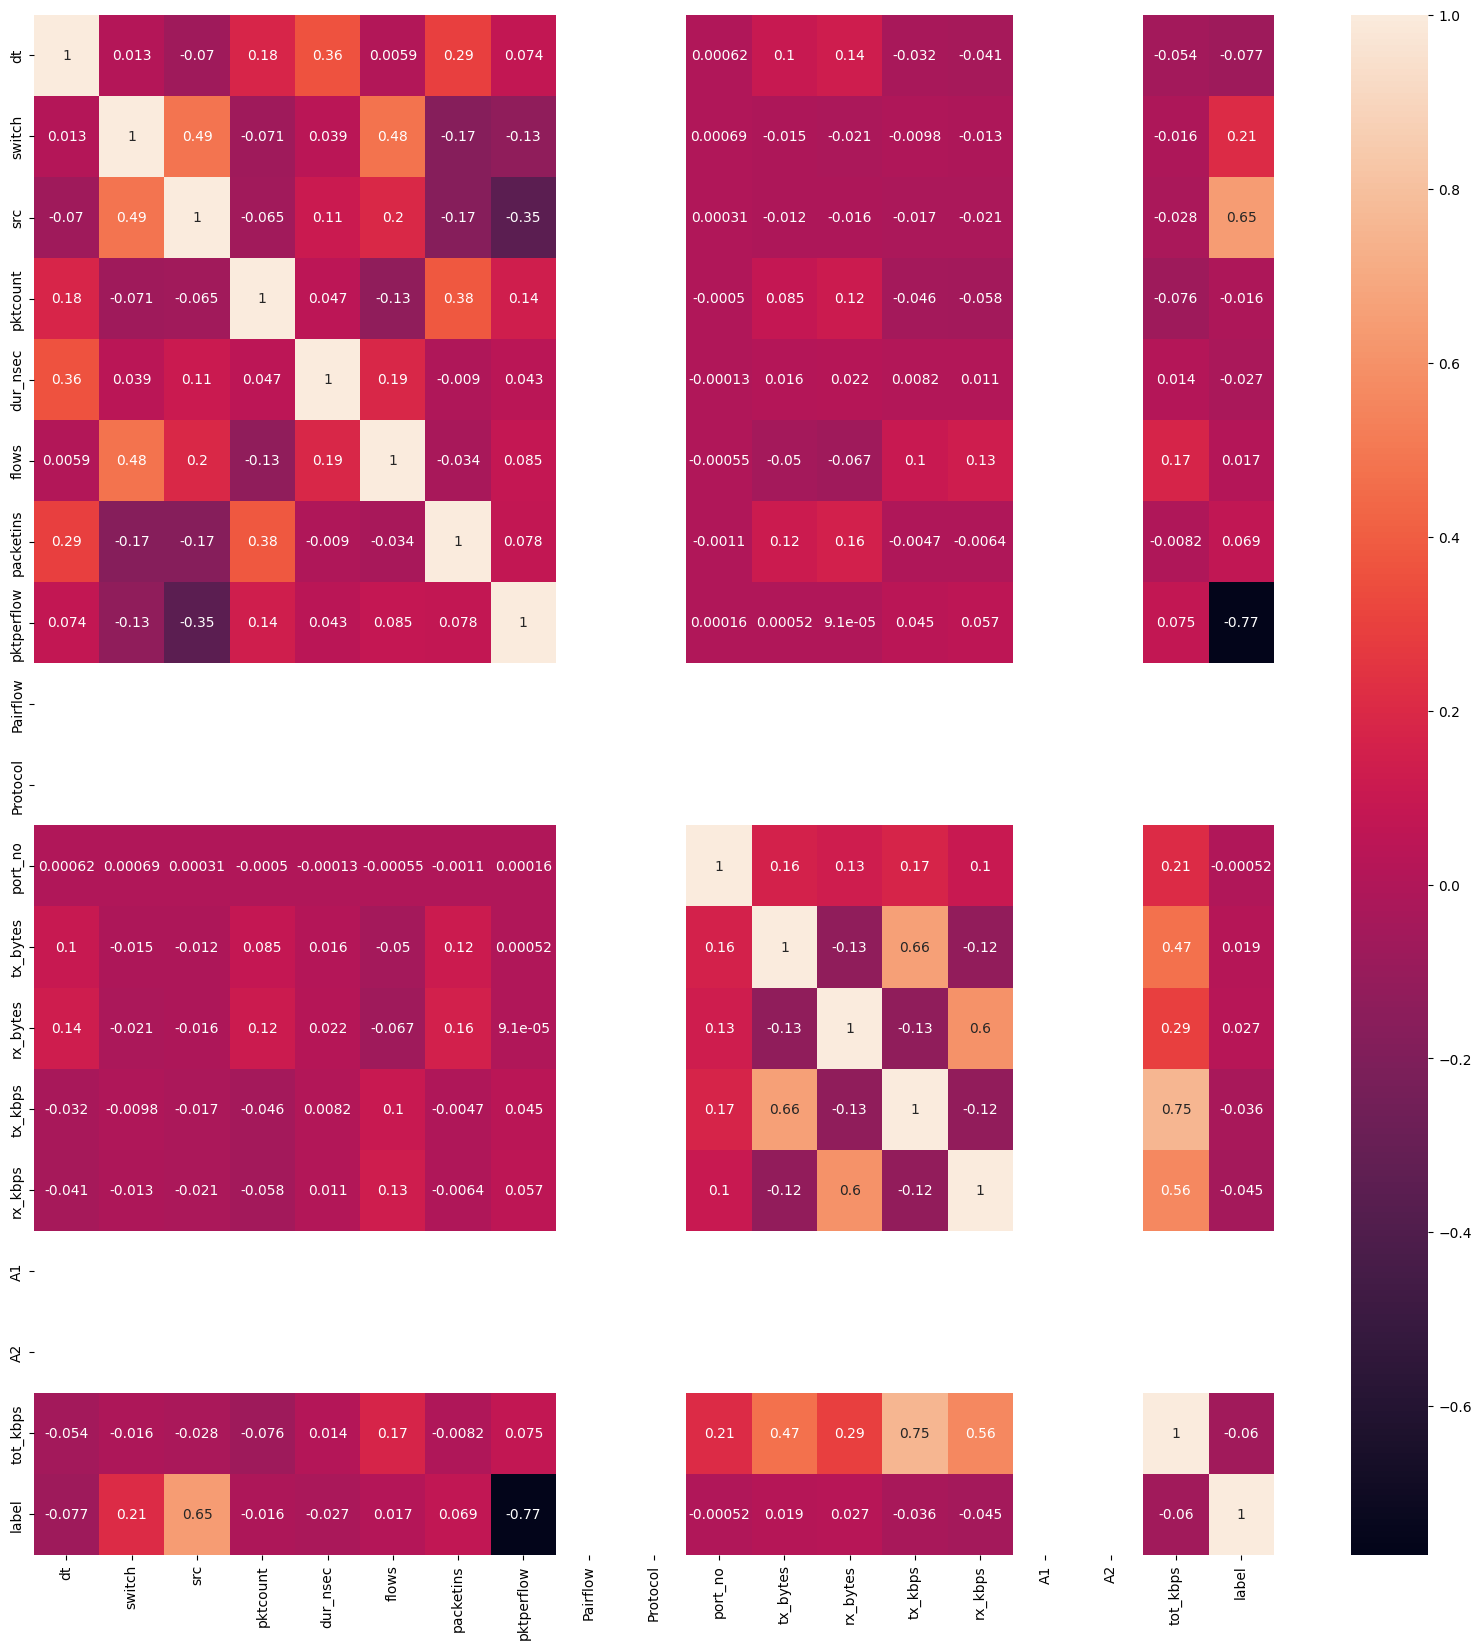

In [12]:
corr= dfcombine.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)


In [13]:
#split 
from sklearn.model_selection import train_test_split
X = dfcombine.drop('label', axis=1)
y = dfcombine['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
model = models.Sequential()
model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [59]:
y_train.unique()

array([0, 1], dtype=int64)

In [60]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2, validation_data=(X_test, y_test))

Epoch 1/100
1120/1120 - 6s - loss: 1266754.6250 - accuracy: 0.5662 - val_loss: 792843.5000 - val_accuracy: 0.5544 - 6s/epoch - 5ms/step
Epoch 2/100
1120/1120 - 3s - loss: 973724.5000 - accuracy: 0.5732 - val_loss: 1413465.7500 - val_accuracy: 0.5177 - 3s/epoch - 3ms/step
Epoch 3/100
1120/1120 - 3s - loss: 692101.1250 - accuracy: 0.5881 - val_loss: 528552.3125 - val_accuracy: 0.5731 - 3s/epoch - 3ms/step
Epoch 4/100
1120/1120 - 3s - loss: 627533.1250 - accuracy: 0.5723 - val_loss: 335353.6250 - val_accuracy: 0.5267 - 3s/epoch - 2ms/step
Epoch 5/100
1120/1120 - 5s - loss: 557548.3125 - accuracy: 0.5910 - val_loss: 904258.4375 - val_accuracy: 0.5825 - 5s/epoch - 5ms/step
Epoch 6/100
1120/1120 - 5s - loss: 396068.9375 - accuracy: 0.5981 - val_loss: 187813.5156 - val_accuracy: 0.5927 - 5s/epoch - 5ms/step
Epoch 7/100
1120/1120 - 3s - loss: 395375.3438 - accuracy: 0.5803 - val_loss: 149322.8281 - val_accuracy: 0.6187 - 3s/epoch - 2ms/step
Epoch 8/100
1120/1120 - 3s - loss: 311029.7500 - accu

Model with Regularization

In [67]:
from tensorflow.keras import regularizers

def build_model_with_regularization(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                  metrics=['accuracy'])

    # Compile model as before
    return model

In [68]:
model = build_model_with_regularization(input_shape=(X_train.shape[1],), num_classes=np.unique(y_train).size)

# Train model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
280/280 [==============================] - 3s 5ms/step - loss: 1126793.5000 - accuracy: 0.5549 - val_loss: 284502.2812 - val_accuracy: 0.5857
Epoch 2/20
280/280 [==============================] - 1s 4ms/step - loss: 371757.0938 - accuracy: 0.5685 - val_loss: 206770.6875 - val_accuracy: 0.5295
Epoch 3/20
280/280 [==============================] - 2s 5ms/step - loss: 283001.5625 - accuracy: 0.5775 - val_loss: 599563.6875 - val_accuracy: 0.5179
Epoch 4/20
280/280 [==============================] - 1s 4ms/step - loss: 252094.4375 - accuracy: 0.5707 - val_loss: 189994.1094 - val_accuracy: 0.6228
Epoch 5/20
280/280 [==============================] - 1s 4ms/step - loss: 297314.6250 - accuracy: 0.5786 - val_loss: 316114.5000 - val_accuracy: 0.6161
Epoch 6/20
280/280 [==============================] - 1s 4ms/step - loss: 294640.6562 - accuracy: 0.5717 - val_loss: 188284.2188 - val_accuracy: 0.6214
Epoch 7/20
280/280 [==============================] - 1s 4ms/step - loss: 250910.4062 -